In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


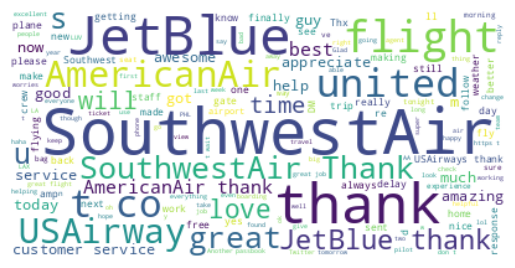

In [10]:
# Import the word cloud function 
from wordcloud import WordCloud 
# text_tweet = pd.read_csv('./Tweets.csv')
with open('./text_tweet.txt', 'r',encoding='utf-8') as f:
    text_tweet = f.read()
# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

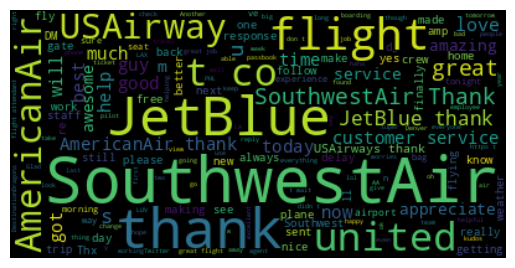

In [11]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS 

# Define the list of stopwords
my_stop_words = STOPWORDS.update(['airline', 'airplane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

In [12]:
# ```
tweets = pd.read_csv('./Tweets.csv')
# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=list(my_stop_words))
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   00  000  000114  000419  000ft  000lbs  0011  0016  00a  00am  ...  \
0   0    0       0       0      0       0     0     0    0     0  ...   
1   0    0       0       0      0       0     0     0    0     0  ...   
2   0    0       0       0      0       0     0     0    0     0  ...   
3   0    0       0       0      0       0     0     0    0     0  ...   
4   0    0       0       0      0       0     0     0    0     0  ...   

   zrh_airport  zsdgzydnde  zsuztnaijq  ztrdwv0n4l  zukes  zurich  zv2pt6trk9  \
0            0           0           0           0      0       0           0   
1            0           0           0           0      0       0           0   
2            0           0           0           0      0       0           0   
3            0           0           0           0      0       0           0   
4            0           0           0           0      0       0           0   

   zv6cfpohl5  zvfmxnuelj  zzps5ywve2  
0           0           0         

In [13]:
# Import the vectorizer and default English stop words list
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS 

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
 
# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=list(my_stop_words))
vect2 = CountVectorizer(stop_words=list(ENGLISH_STOP_WORDS))
vect1.fit(tweets.text)
vect2.fit(tweets.negativereason.dropna())

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names_out()[-15:])
print(vect2.get_feature_names_out())

['zoom' 'zouowgv3q6' 'zpz78poeon' 'zqutus7epw' 'zrh' 'zrh_airport'
 'zsdgzydnde' 'zsuztnaijq' 'ztrdwv0n4l' 'zukes' 'zurich' 'zv2pt6trk9'
 'zv6cfpohl5' 'zvfmxnuelj' 'zzps5ywve2']
['attendant' 'bad' 'booking' 'cancelled' 'complaints' 'customer' 'damaged'
 'flight' 'issue' 'late' 'longlines' 'lost' 'luggage' 'problems' 'service'
 'tell']


In [15]:
# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(tweets.text)
vect.transform(tweets.text)
print('Length of vectorizer: ', len(vect.get_feature_names_out()))

Length of vectorizer:  11893


In [17]:
# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names_out()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names_out()))

Length of vectorizer 1:  15051
Length of vectorizer 2:  643


In [19]:
# Import the word tokenizing package
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


In [21]:
tweets_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
 "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
 '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']


In [22]:
# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


In [24]:
# Import the required packages from nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()
GoT = 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

# Tokenize the GoT string
tokens = word_tokenize(GoT) 

In [25]:
import time

# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0010006427764892578
Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


In [26]:
import time

# Log the start time
start_time = time.time()

# Build a lemmatized list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens) 

Time taken for lemmatizing in seconds:  1.2903907299041748
Lemmatized tokens:  ['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


In [32]:
non_english_reviews =pd.DataFrame({'score': {1: 1, 3: 1, 4: 1, 5: 1, 7: 1, 9: 1, 11: 1, 12: 0, 13: 1, 17: 1, 18: 1, 20: 1, 24: 1, 26: 1, 28: 0}, 'review': {1: ' La reencarnación vista por un científico: El primer libro del Dr. Weiss sigue siendo un gran libro para todos aquellos a quienes les inquieta el tema de la reencarnación, así no crean en ella.\r\n', 3: ' Magnifico libro: Brian Weiss ha dejado una magnifica guia para quienes no tienen mucha informacion acerca del Hipnotismo, La historia de Katerine es tan impresionante que podria ayudar a culquier persona que se ha hecho la pregunta mas de una vez sobre la continuidad de la vida.\r\n', 4: ' El libro mas completo que existe para nosotras,: las m,ujeres embarazadas o por embarazarnos...LO ABARCA TODO, DESDE LA CONCEPCION HASTA QUE EL BEBE CUMPLE UN AÑO...Dulce, sabio y ameno...\r\n', 5: ' Excelente!: Una excelente guía para todos aquellos que deseen concer más aobre el vino y su mundo. De forma amena y sencilla explica los principales conceptos y orienta sobre temas básicos como la elección del vino corecto, principales tipos de vino, cómo comprar vino en restaurantes o tiendas, etc.\r\n', 7: ' Palabras de aliento para tu caminar con Dios: Una vez mas Charles Swindoll llega al corazón del cristiano como tu y como yo. Nos alienta y nos da enseñanza de como enfrentar nuestros Gigantes, reconocer su origen y escudriñar en nuestro corazón para dar con esas espinas que han estado clavadas por mucho tiempo e impide que nuestro caminar con Dios sea firme. Prácticos y profundos principios para ayudarnos a ser mejores en nuestra casa, trabajo y en la iglesia.\r\n', 9: ' fabuloso: mil gracias por el producto fabuloso recomiendo a este vendedor todo llego en perfectas condiciones excelentesaludos espero seguir contando con ustedes\r\n', 11: ' Excelentes botas.. excelentes boots: Excelente producto, quedo muy satisfecho con el producto y con Amazon, por la puntualidad en la entrega,la calidad del producto, zapatos muy comodos, resistentes. Excelente muy recomendable.\r\n', 12: " Why not Spanish ???: Alguien me puede decir porque la serie Three's Company no viene ni con audio ni con subtitulos en ESPAÑOL.Esta serie fue vista a nivel mundial, si casi todas las series que salen en dvd con varios idiomas que paso con esta si es una de las mejores de todos los tiempos.Una comedia excelente y unica deberian de haber tomado en cuenta aca en mi pais la dieron con audio en español, donde quedo eso ???.Ahora si viene en audio ESPAÑOL o por lo menos subtitulo pido mil disculpas pero no dice por ningun lado en la descripcion del producto.SALUDOS\r\n", 13: ' La mejor película de Moore: A mi juicio, esta es la mejor comedia de Dudley Moore.El reparto es excelente.Realmente la recomiendo.\r\n', 17: ' Buen cargador: Product very good, I am of Venezuela the exelente product thanks(Producto muy buenos, soy de venezuela el producto exelente gracias)\r\n', 18: ' 5+ stars. LO MEJOR DE LO QUE HE LEIDO EN MI VIDA.: Un resúmen:El clan del oso cavernario: EXCELENTE, INSPIRADOR.Un libro para leer y releer, es como un libro de superación personal, pero sin los aburridos consejos sabiondos de los autores, ni las falsas promesas de los nuevos autores llamados "new age". DEBE LEERLO, Y POR FAVOR, NO LO PRESTE.....!El valle de los caballos: BUENA SECUELA, RECOMENDABLE.Los cazadores del mamut: SOLO PARA FANS.El libro de los viajes ("Plains"): REPETITIVO, LENTO Y ABURRIDO EN DOS TERCERAS PARTES (LA\'ÚLTIMA PARTE, COMO EN "cazadores", PARA FANS).....LA ESPERANZA...."The Shelter of stone"...donde los que admiramos a Ayla, esperamos reencontrarnos con ella...\r\n', 20: ' Variedad: Bueno tener este album debido a su sonido peculiar, algunas de sus canciones hasta fueron programadas aca en la radio en Guanatos...es + el Kala (Rostros Ocultos) se encargó de hacer un cover el cual fue un exito en español - con los Smithreens nunca lo fue - ("Tiempo de Cambiar" o "Something New"). Saludos de neta. Mork\r\n', 24: ' Exelente eleccion: Los mejores zapatos de futbol que he comprado en mi vida, funcionan perfecto para cesped artifical, cesped natural y piso duro.Lo recomiendo 100%\r\n', 26: " Excelente: Manu es una de los mejores cantantes del Operacion Triunfo.Aunque la musica es un poco 'easy listening', este CD es su premera y Manu la hace muy bien y no se falta su voz. Me encanta este chico y creo que el va a hacer mucho mas.\r\n", 28: ' baaaaaadddddddd bookkkkkkk: por favor no gaste su dinero en este pesimo y mediocre libro,,lo unico que la mujer y el chino hacen es mostrar su impresionante flexibilidad,pero nada mas,,no aportan tecnicas reales ni explicaciones para llegar a ese estado.me parece mas bien que los autores lo que quieren es que la gente sepa que ellos tienen una super-flexibilidad impresionante.este es solamente un librito y nada mas,, muy,,muy pero muy mediocre\r\n'}, 'language': {1: 'es', 3: 'es', 4: 'es', 5: 'es', 7: 'es', 9: 'es', 11: 'es', 12: 'es', 13: 'es', 17: 'es', 18: 'es', 20: 'es', 24: 'es', 26: 'es', 28: 'es'}}
)

In [33]:
# Import the language detection package
import langdetect

# Loop over the rows of the dataset and append  
languages = [] 
for i in range(len(non_english_reviews)):
    languages.append(langdetect.detect_langs(non_english_reviews.iloc[i, 1]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]
# Assign the list to a new feature 
non_english_reviews['language'] = languages

# Select the Spanish ones
filtered_reviews = non_english_reviews[non_english_reviews.language == 'es']

In [34]:
# Import the required packages
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

# Import the Spanish SnowballStemmer
SpanishStemmer = SnowballStemmer("spanish")

# Create a list of tokens
tokens = [word_tokenize(review) for review in filtered_reviews.review] 
# Stem the list of tokens
stemmed_tokens = [[SpanishStemmer.stem(word) for word in token] for token in tokens]

# Print the first item of the stemmed tokenss
print(stemmed_tokens[0])

['la', 'reencarn', 'vist', 'por', 'un', 'cientif', ':', 'el', 'prim', 'libr', 'del', 'dr.', 'weiss', 'sig', 'siend', 'un', 'gran', 'libr', 'par', 'tod', 'aquell', 'a', 'quien', 'les', 'inquiet', 'el', 'tem', 'de', 'la', 'reencarn', ',', 'asi', 'no', 'cre', 'en', 'ella', '.']


In [35]:
# Import the function to perform stemming
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(tweet) for tweet in tweets]

# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens]

# Print the first element of the list
print(stemmed_tokens[0])

['tweet_id']


In [36]:
# Import the required function
from sklearn.feature_extraction.text import TfidfVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Call the vectorizer and fit it
anna_vect = TfidfVectorizer().fit(annak)

# Create the tfidf representation
anna_tfidf = anna_vect.transform(annak)

# Print the result 
print(anna_tfidf.toarray())

[[0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.30151134 0.         0.30151134
  0.         0.30151134 0.30151134 0.30151134 0.30151134 0.60302269
  0.30151134]]


In [39]:
# Import the required vectorizer package and stop words list
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1,2), max_features=100, token_pattern=my_pattern, stop_words=list(ENGLISH_STOP_WORDS)).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)
 
# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names_out())
print('Top 5 rows of the DataFrame: ', X.head())

Top 5 rows of the DataFrame:      aa  agent  airline  airport  americanair       amp  bag  baggage  bags  \
0  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
1  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
2  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
3  0.0    0.0      0.0      0.0          0.0  0.537247  0.0      0.0   0.0   
4  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   

   cancelled  ...        ve  virginamerica  wait  waiting  want  way  weather  \
0        0.0  ...  0.000000       1.000000   0.0      0.0   0.0  0.0      0.0   
1        0.0  ...  0.544485       0.531770   0.0      0.0   0.0  0.0      0.0   
2        0.0  ...  0.000000       0.407271   0.0      0.0   0.0  0.0      0.0   
3        0.0  ...  0.000000       0.559828   0.0      0.0   0.0  0.0      0.0   
4        0.0  ...  0.000000       0.663756   0.0      0.0   0.0  0.0      0.0   

   work  worst

In [46]:
# Import the required packages
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
reviews = pd.read_csv('./IMDB_sample.csv')
# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews.review)
vect2 = TfidfVectorizer(max_features=100).fit(reviews.review) 

# Transform the vectorizers
X1 = vect1.transform(reviews.review)
X2 = vect2.transform(reviews.review)

# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names_out())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names_out())
print('Top 5 rows using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows using BOW: 
    about  after  all  also  an  and  any  are  as  at  ...  well  were  what  \
0      0      0    0     0   0    1    0    0   2   0  ...     0     0     0   
1      0      0    3     1   1   11    0    3   3   4  ...     0     0     1   
2      0      1    0     0   1    7    0    1   2   1  ...     0     0     0   
3      0      0    0     0   2    1    0    1   2   2  ...     1     0     0   
4      0      0    3     0   0    8    0    3   1   0  ...     2     1     0   

   when  which  who  will  with  would  you  
0     0      0    0     0     1      1    0  
1     1      2    0     2     7      2    3  
2     0      0    0     0     2      0    0  
3     0      0    1     0     0      0    1  
4     1      1    0     0     2      0    0  

[5 rows x 100 columns]
Top 5 rows using tfidf: 
    about     after       all      also        an       and  any       are  \
0    0.0  0.000000  0.000000  0.000000  0.000000  0.050874  0.0  0.000000   
1    0.0  0.000

In [ ]:
vect1 = CountVectorizer(max_features=100).fit(reviews.review)

# Transform the vectorizers
X1 = vect1.transform(reviews.review)

# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names_out())